In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('merged_flights.csv')
df.head()

,booking_date,travel_date,route_type,travel_class,flight_number,price,total_duration,n_legs,n_stops,avg_legroom,carbon_this,carbon_route_typ,carbon_diff_pct,delayed_any,layover_total_duration,days_to_departure,price_per_minute,price_per_leg,is_direct,avg_stop_duration
0,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 985,596,1390,2,1,31.000000,1094000,1000000,9,False,125,27,0.428777,298.0,0,125.0
1,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,602,1380,2,1,33.000000,1123000,1000000,12,False,275,27,0.436232,301.0,0,275.0
2,2025-05-14 16:47:50,2025-06-11,One way,Economy,CX 742,645,1315,2,1,31.000000,888000,1000000,-11,False,245,27,0.490494,322.5,0,245.0
3,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 983,596,1485,2,1,31.000000,966000,1000000,-3,False,220,27,0.401347,298.0,0,220.0
4,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,606,1591,3,2,31.666667,948000,1000000,-5,True,432,27,0.380893,202.0,0,216.0


In [13]:
df['days_to_departure'].value_counts()

days_to_departure
 27    28
 12    27
 13    25
 41    24
 26    24
 40    23
-1     22
Name: count, dtype: int64

In [5]:
df.describe(include='all')

,booking_date,travel_date,route_type,travel_class,flight_number,price,total_duration,n_legs,n_stops,avg_legroom,carbon_this,carbon_route_typ,carbon_diff_pct,delayed_any,layover_total_duration,days_to_departure,price_per_minute,price_per_leg,is_direct,avg_stop_duration
count,173,173,173,173,173,173.000000,173.000000,173.000000,173.000000,93.000000,1.730000e+02,1.730000e+02,173.000000,173,173.000000,173.000000,173.000000,173.000000,173.0,173.000000
unique,14,4,1,2,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-05-14 16:47:50,2025-06-11,One way,Economy,NH 898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,14,52,173,88,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2067.190751,1541.115607,2.202312,1.202312,32.008961,2.443347e+06,2.501439e+06,-1.404624,NaN,392.156069,22.606936,1.406694,967.340077,0.0,326.798651
std,NaN,NaN,NaN,NaN,NaN,1403.870055,322.829422,0.430785,0.430785,0.885800,1.490179e+06,1.497120e+06,13.999102,NaN,315.458625,13.955759,1.029112,679.711691,0.0,256.487757
min,NaN,NaN,NaN,NaN,NaN,559.000000,1235.000000,2.000000,1.000000,30.000000,7.570000e+05,1.000000e+06,-50.000000,NaN,90.000000,-1.000000,0.216402,157.000000,0.0,90.000000
25%,NaN,NaN,NaN,NaN,NaN,680.000000,1345.000000,2.000000,1.000000,31.500000,9.760000e+05,1.000000e+06,-11.000000,NaN,205.000000,12.000000,0.476923,322.500000,0.0,195.000000
50%,NaN,NaN,NaN,NaN,NaN,2554.000000,1435.000000,2.000000,1.000000,32.000000,1.992000e+06,3.983000e+06,-3.000000,NaN,245.000000,26.000000,1.382224,948.666667,0.0,230.000000
75%,NaN,NaN,NaN,NaN,NaN,2992.000000,1705.000000,2.000000,1.000000,32.500000,3.864000e+06,3.983000e+06,9.000000,NaN,630.000000,40.000000,2.086447,1496.000000,0.0,352.500000


In [11]:
# df.info()
df.isnull().sum()

booking_date               0
travel_date                0
route_type                 0
travel_class               0
flight_number              0
price                      0
total_duration             0
n_legs                     0
n_stops                    0
avg_legroom               80
carbon_this                0
carbon_route_typ           0
carbon_diff_pct            0
delayed_any                0
layover_total_duration     0
days_to_departure          0
price_per_minute           0
price_per_leg              0
is_direct                  0
avg_stop_duration          0
dtype: int64

In [ ]:
#Change -1 day left to 0
df['days_to_departure'] = df['days_to_departure'].replace(-1, 0)
df['days_to_departure'].value_counts()

days_to_departure
27    28
12    27
13    25
41    24
26    24
40    23
0     22
Name: count, dtype: int64

In [24]:
df['delayed_any'] = df['delayed_any'].replace({True: 1, False: 0})
df['delayed_any']

C:\Users\jimmy\AppData\Local\Temp\ipykernel_904\1095073554.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['delayed_any'] = df['delayed_any'].replace({True: 1, False: 0})


0      0
1      0
2      0
3      0
4      1
      ..
168    1
169    0
170    0
171    0
172    0
Name: delayed_any, Length: 173, dtype: int64

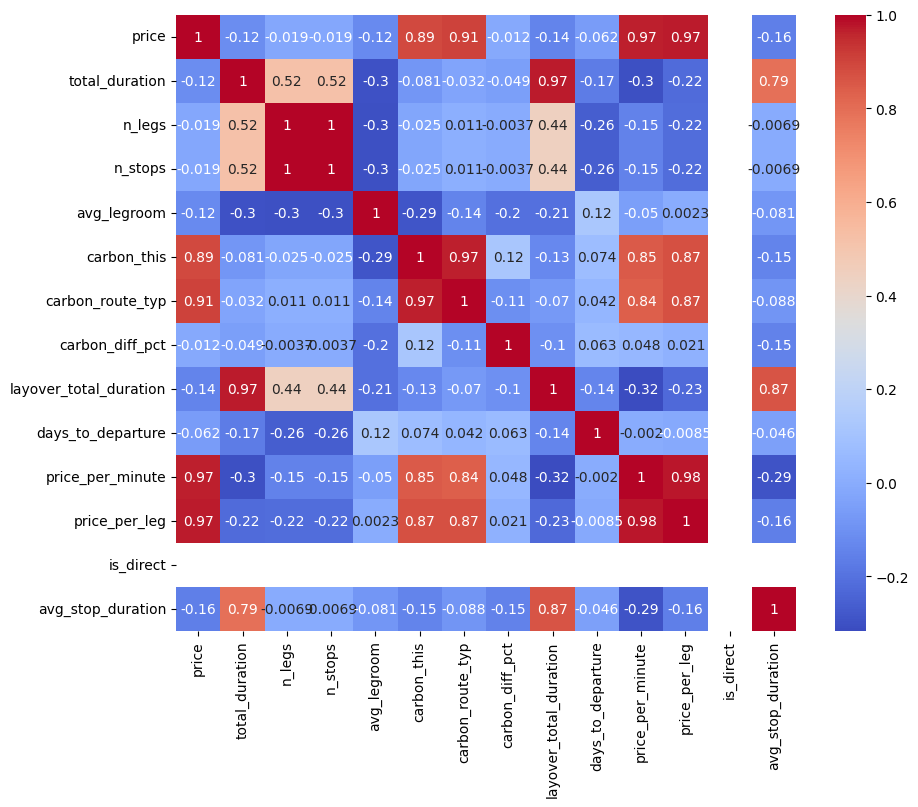

In [19]:
numeric_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm")
plt.show()

In [36]:
numeric_features.info()
numFeats = numeric_features.drop(columns='avg_legroom')
numFeats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   173 non-null    int64  
 1   total_duration          173 non-null    int64  
 2   n_legs                  173 non-null    int64  
 3   n_stops                 173 non-null    int64  
 4   avg_legroom             93 non-null     float64
 5   carbon_this             173 non-null    int64  
 6   carbon_route_typ        173 non-null    int64  
 7   carbon_diff_pct         173 non-null    int64  
 8   layover_total_duration  173 non-null    int64  
 9   days_to_departure       173 non-null    int64  
 10  price_per_minute        173 non-null    float64
 11  price_per_leg           173 non-null    float64
 12  is_direct               173 non-null    int64  
 13  avg_stop_duration       173 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 19.

,price,total_duration,n_legs,n_stops,carbon_this,carbon_route_typ,carbon_diff_pct,layover_total_duration,days_to_departure,price_per_minute,price_per_leg,is_direct,avg_stop_duration
0,596,1390,2,1,1094000,1000000,9,125,27,0.428777,298.0,0,125.0
1,602,1380,2,1,1123000,1000000,12,275,27,0.436232,301.0,0,275.0
2,645,1315,2,1,888000,1000000,-11,245,27,0.490494,322.5,0,245.0
3,596,1485,2,1,966000,1000000,-3,220,27,0.401347,298.0,0,220.0
4,606,1591,3,2,948000,1000000,-5,432,27,0.380893,202.0,0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2967,1442,3,2,2973000,3983000,-25,250,13,2.057559,989.0,0,125.0
169,3112,1745,2,1,4053000,3983000,2,655,13,1.783381,1556.0,0,655.0
170,3955,1260,2,1,4488000,3983000,13,195,13,3.138889,1977.5,0,195.0
171,3988,1235,2,1,3904000,3983000,-2,90,13,3.229150,1994.0,0,90.0


In [38]:
encoder = OrdinalEncoder(categories=[['Economy', 'Business Class']])
df['class_encoded'] = encoder.fit_transform(df[['travel_class']])
df['class_encoded']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
168    1.0
169    1.0
170    1.0
171    1.0
172    1.0
Name: class_encoded, Length: 173, dtype: float64

In [44]:
x = numFeats
y = df['class_encoded'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model is: {acc}')

Accuracy of the model is: 1.0


In [13]:
le = LabelEncoder()
df["overnight"] = le.fit_transform(df["overnight"])
df['overnight'].value_counts()

overnight
1    170
0    129
Name: count, dtype: int64

In [ ]:

x = df.drop(columns=['overnight', 'is_within_budget'])
y = df['is_within_budget']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
model.coef_
model.intercept_

ValueError: could not convert string to float: '2025-05-14'